# Question 2

I am Dhairya Shah, and I thank you to provide my a chance to work with you on future projects. I tried my best on working on the second problem, and have presented my work below. I have taken some assumptions and made some observations that I have mentioned in the markdown cells. 

Fit a CNN model from scratch on MNIST dataset and try to get the maximum accuracy by hyperparameter tuning. Apply MC dropout method and compare your results again with non-MC dropout method.

a.  For Non-MC dropout model, remove the final layer and plot TSNE plot from the fitted model's outputs.

b.  Predict on some Fashion MNIST data points and check the predictive accuracy and uncertainty in predictions.

c. Repeat a. for MNIST + Fashion MNIST points and see if your see a pattern, something like if Fashion MNIST points are far from the other points.

In [99]:
# imports here
from keras.datasets import mnist
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std
from keras.models import save_model
from keras.models import load_model
from sklearn.manifold import TSNE
from keras.datasets import fashion_mnist
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer


In [59]:
# loading MNIST dataset (digits)
(trainX, trainY), (testX, testY) = mnist.load_data()

# print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
# print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

In [ ]:
# data preprocessing
train_X = trainX.reshape(-1, 28,28, 1)
test_X = testX.reshape(-1, 28,28, 1)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255
train_Y_one_hot = to_categorical(trainY)
test_Y_one_hot = to_categorical(testY)

I am using 2 convolution layers and 2 max pooling layers with relu activation in between, and after the feature extraction I am using a MLP with 2 hidden layers and then after using softwax it will return the probabilities corresponding to the 10 classes, that's why last layer has 10 nodes.

I am taking constant values of filter size, pool size, number of layers, etc for now. Otherwise they are the hyperparameters and can be fine-tuned further to improve the architecture.

In [ ]:
# CNN Model to be trained on MNIST dataset without dropout
def define_model():
    model = Sequential()
    model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return model

This is the model with good hyperparams, and I am saving it to use it further. 

In [56]:
# training the model on train set of MNIST and saving in h5 file so that we dont have to train again
model = define_model()
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=8)
save_model(model, 'model.h5')

Epoch 1/8
938/938 [==============================] - 12s 12ms/step - loss: 0.1481 - accuracy: 0.9553
Epoch 2/8
938/938 [==============================] - 11s 12ms/step - loss: 0.0484 - accuracy: 0.9847
Epoch 3/8
938/938 [==============================] - 12s 12ms/step - loss: 0.0368 - accuracy: 0.9887
Epoch 4/8
938/938 [==============================] - 12s 13ms/step - loss: 0.0282 - accuracy: 0.9916
Epoch 5/8
938/938 [==============================] - 12s 12ms/step - loss: 0.0229 - accuracy: 0.9927
Epoch 6/8
938/938 [==============================] - 11s 12ms/step - loss: 0.0181 - accuracy: 0.9943
Epoch 7/8
938/938 [==============================] - 11s 12ms/step - loss: 0.0154 - accuracy: 0.9952
Epoch 8/8
938/938 [==============================] - 12s 13ms/step - loss: 0.0128 - accuracy: 0.9959


/var/folders/dx/m9d65spx18l9gvlny7r92xg40000gn/T/ipykernel_89542/1104186534.py:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'model.h5')


In [83]:
# loading the model and predicting on test set
model = load_model('model.h5')
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))
print(np.argmax(np.round(test_Y_one_hot[0])))

313/313 [==============================] - 2s 5ms/step - loss: 0.0339 - accuracy: 0.9904
Test loss 0.03388132154941559
Test accuracy 0.9904000163078308


313/313 [==============================] - 2s 5ms/step
7
7


t-distributed stochastic neighbor embedding (t-SNE) is a statistical method for visualizing high-dimensional data by giving each datapoint a location in a 2D map. I am using this to visualize the predictions of my model on MNIST dataset (only 5000 for clarity), and it looks like they are clearly well clustered which says that my model is doing good and justifies the accuracy of 99.04.

157/157 [==============================] - 1s 3ms/step


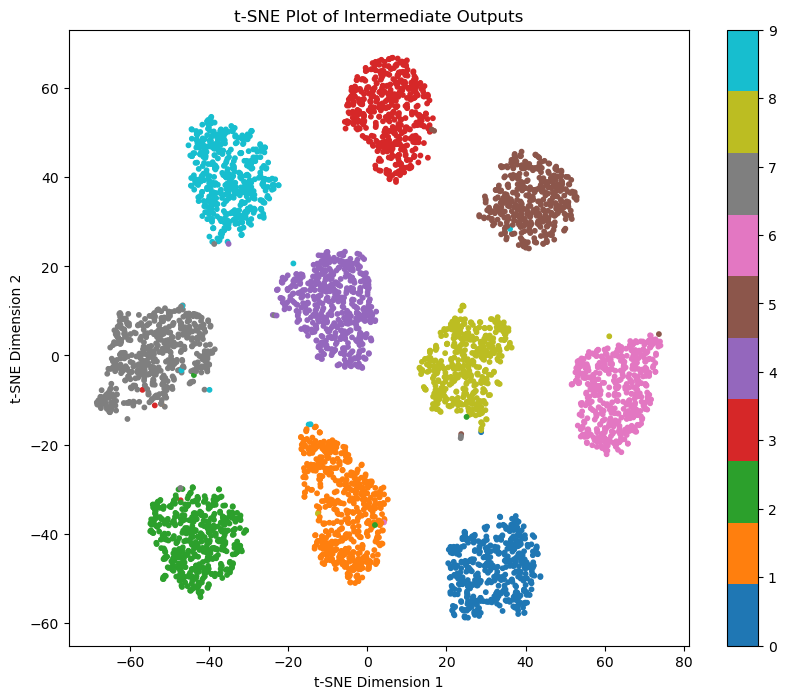

In [76]:
# using TSNE() with 2 components to see the plot in 2-D for MNIST
model_without_last_layer = Sequential(model.layers[:-1])
intermediate_outputs = model_without_last_layer.predict(train_X[:5000])
tsne = TSNE(n_components=2)
tsne_outputs = tsne.fit_transform(intermediate_outputs)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_outputs[:, 0], tsne_outputs[:, 1], c=np.argmax(train_Y_one_hot[:5000], axis=1), cmap='tab10', s=10)
plt.colorbar()
plt.title('t-SNE Plot of Intermediate Outputs')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

K Fold cross validation on epochs. I haven't considered other hyper parameters due to less time, but yes the model and the architecture can be further optimised by tuning the hyper parameters

In [49]:
# K fold cross validation 
k = 4
cross_val = KFold(k, shuffle=True, random_state=1)
fold_count = 1
i = -1
epochs = [3, 5, 8, 10]
eval_scores = []
es_callbacks = keras.callbacks.EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=4)

In [50]:
for train, validation in cross_val.split(train_X):
    print("="*80)
    print("Fold-{}".format(fold_count))
    print("-"*80)
    print("Training & Validation")
    fold_count = fold_count + 1
    i = i+1
    model = define_model()
    
    X_train, y_train = train_X[train], train_Y_one_hot[train]
    X_val, y_val = train_X[validation], train_Y_one_hot[validation]
    
    history = model.fit(X_train, y_train,
                        epochs=epochs[i],
                        validation_data=(X_val, y_val),
                        callbacks=[es_callbacks])
    
    print("-"*80)
    print("Testing/evaluation")
    eval_loss, eval_accuracy = model.evaluate(test_X, test_Y_one_hot)
    eval_scores.append(eval_accuracy)
    print("_"*80)

Fold-1
--------------------------------------------------------------------------------
Training & Validation
Epoch 1/3
1407/1407 [==============================] - 26s 18ms/step - loss: 0.1415 - accuracy: 0.9568 - val_loss: 0.0719 - val_accuracy: 0.9793
Epoch 2/3
1407/1407 [==============================] - 24s 17ms/step - loss: 0.0468 - accuracy: 0.9850 - val_loss: 0.0564 - val_accuracy: 0.9833
Epoch 3/3
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0333 - accuracy: 0.9889 - val_loss: 0.0466 - val_accuracy: 0.9865
--------------------------------------------------------------------------------
Testing/evaluation
313/313 [==============================] - 2s 5ms/step - loss: 0.0359 - accuracy: 0.9883
________________________________________________________________________________
Fold-2
--------------------------------------------------------------------------------
Training & Validation


Epoch 1/5
1407/1407 [==============================] - 24s 17ms/step - loss: 0.1361 - accuracy: 0.9584 - val_loss: 0.0584 - val_accuracy: 0.9826
Epoch 2/5
1407/1407 [==============================] - 24s 17ms/step - loss: 0.0484 - accuracy: 0.9855 - val_loss: 0.0514 - val_accuracy: 0.9824
Epoch 3/5
1407/1407 [==============================] - 18s 13ms/step - loss: 0.0339 - accuracy: 0.9889 - val_loss: 0.0358 - val_accuracy: 0.9891
Epoch 4/5
1407/1407 [==============================] - 11s 8ms/step - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0474 - val_accuracy: 0.9856
Epoch 5/5
1407/1407 [==============================] - 11s 8ms/step - loss: 0.0212 - accuracy: 0.9930 - val_loss: 0.0476 - val_accuracy: 0.9875
--------------------------------------------------------------------------------
Testing/evaluation
313/313 [==============================] - 1s 2ms/step - loss: 0.0434 - accuracy: 0.9885
________________________________________________________________________________
Fold-3


Epoch 1/8
1407/1407 [==============================] - 11s 8ms/step - loss: 0.1421 - accuracy: 0.9560 - val_loss: 0.0590 - val_accuracy: 0.9823
Epoch 2/8
1407/1407 [==============================] - 11s 8ms/step - loss: 0.0502 - accuracy: 0.9845 - val_loss: 0.0498 - val_accuracy: 0.9844
Epoch 3/8
1407/1407 [==============================] - 11s 8ms/step - loss: 0.0358 - accuracy: 0.9894 - val_loss: 0.0676 - val_accuracy: 0.9799
Epoch 4/8
1407/1407 [==============================] - 12s 8ms/step - loss: 0.0272 - accuracy: 0.9916 - val_loss: 0.0359 - val_accuracy: 0.9892
Epoch 5/8
1407/1407 [==============================] - 11s 8ms/step - loss: 0.0222 - accuracy: 0.9927 - val_loss: 0.0340 - val_accuracy: 0.9893
Epoch 6/8
1407/1407 [==============================] - 11s 8ms/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.0360 - val_accuracy: 0.9899
Epoch 7/8
1407/1407 [==============================] - 11s 8ms/step - loss: 0.0139 - accuracy: 0.9956 - val_loss: 0.0408 - val_accuracy:

________________________________________________________________________________
Fold-4
--------------------------------------------------------------------------------
Training & Validation
Epoch 1/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.1430 - accuracy: 0.9568 - val_loss: 0.0578 - val_accuracy: 0.9838
Epoch 2/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.0495 - accuracy: 0.9848 - val_loss: 0.0459 - val_accuracy: 0.9859
Epoch 3/10
1407/1407 [==============================] - 12s 8ms/step - loss: 0.0344 - accuracy: 0.9890 - val_loss: 0.0432 - val_accuracy: 0.9865
Epoch 4/10
1407/1407 [==============================] - 12s 8ms/step - loss: 0.0268 - accuracy: 0.9911 - val_loss: 0.0392 - val_accuracy: 0.9887
Epoch 5/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.0205 - accuracy: 0.9935 - val_loss: 0.0364 - val_accuracy: 0.9897
Epoch 6/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.0175 

In [104]:
# accuracy of all folds
i = 0
float2 = "{0:.2f}"
for score in eval_scores:
    percent = score * 100
    print(epochs[i])
    print("Fold-{}: {}%".format(i+1, float2.format(percent)))
    i = i + 1

3
Fold-1: 98.83%
5
Fold-2: 98.85%
8
Fold-3: 99.06%
10
Fold-4: 98.76%


I have added 2 layers of dropout in the mlp portion with turning half of the neurons off. This is done as a regularisation process to avoid overfitting. It looks like the new model with dropout is giving the same results. This is the case because it is predicting correctly on the basis of previous layers only. Had I inserted dropout layers during feature extraction, it would have given different results.

In [68]:
# define cnn model with dropout in the mlp portion with probability 0.5
def define_model_dropout():
    model = Sequential()
    model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(64))
    model.add(Dropout(0.5)) 
    model.add(Dense(10))
    model.add(Activation('softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return model

In [69]:
# saving the model with 2 dropout layers
model_dropout = define_model_dropout()
model_dropout.fit(train_X, train_Y_one_hot, batch_size=64, epochs=8)
save_model(model, 'model_dropout.h5')

Epoch 1/8
938/938 [==============================] - 29s 31ms/step - loss: 0.2669 - accuracy: 0.9172
Epoch 2/8
938/938 [==============================] - 27s 29ms/step - loss: 0.1085 - accuracy: 0.9669
Epoch 3/8
938/938 [==============================] - 27s 29ms/step - loss: 0.0841 - accuracy: 0.9741
Epoch 4/8
938/938 [==============================] - 28s 30ms/step - loss: 0.0731 - accuracy: 0.9777
Epoch 5/8
938/938 [==============================] - 30s 32ms/step - loss: 0.0678 - accuracy: 0.9799
Epoch 6/8
938/938 [==============================] - 31s 33ms/step - loss: 0.0609 - accuracy: 0.9812
Epoch 7/8
938/938 [==============================] - 30s 32ms/step - loss: 0.0567 - accuracy: 0.9829
Epoch 8/8
938/938 [==============================] - 30s 32ms/step - loss: 0.0524 - accuracy: 0.9836


/var/folders/dx/m9d65spx18l9gvlny7r92xg40000gn/T/ipykernel_89542/853225710.py:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'model_dropout.h5')


In [71]:
# predicting using the model with dropout
model_with_dropout = load_model('model_dropout.h5')
test_loss_dropout, test_acc_dropout = model_with_dropout.evaluate(test_X, test_Y_one_hot)
print('Test loss with dropout', test_loss_dropout)
print('Test accuracy without dropout', test_acc_dropout)
predictions_dropout = model.predict(test_X)

313/313 [==============================] - 1s 3ms/step - loss: 0.0339 - accuracy: 0.9904
Test loss with dropout 0.03388132154941559
Test accuracy without dropout 0.9904000163078308
313/313 [==============================] - 1s 3ms/step


Now we will look into the fashion mnist dataset. It looks very illogical to use a model which is trained on MNIST dataset to predict on the Fashion MNIST dataset. I will show some similar observations below that supports the above statement.

In [90]:
# loading the fashion mnist data which also consist of 10 classes
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [91]:
# data pre processing
x_train = x_train.reshape(-1, 28,28, 1)
x_test = x_test.reshape(-1, 28,28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

Below is the TNSE plot for 5000 datapoints of fashion mnist dataset. The points are so cluttered which supports the hypothesis that the model will not work for fashion mnist dataset.

157/157 [==============================] - 1s 3ms/step


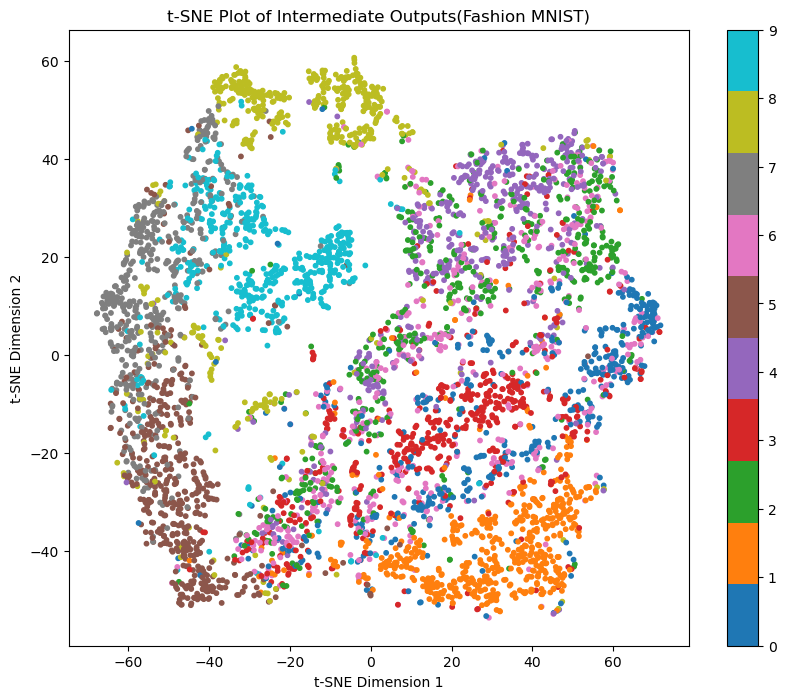

In [77]:
# using TSNE() with 2 components to see the plot in 2-D for Fashion MNIST
model = load_model('model.h5')
model_without_last_layer = Sequential(model.layers[:-1])
intermediate_outputs = model_without_last_layer.predict(x_train[:5000])
tsne = TSNE(n_components=2)
tsne_outputs = tsne.fit_transform(intermediate_outputs)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_outputs[:, 0], tsne_outputs[:, 1], c=np.argmax(y_train_one_hot[:5000], axis=1), cmap='tab10', s=10)
plt.colorbar()
plt.title('t-SNE Plot of Intermediate Outputs(Fashion MNIST)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

Now I will show predictions of MNIST and Fashion MNIST in 2 different colors using the same TNSE plot. This will help us observe some things. 

Distinct clusters for the Fashion MNIST data that are well-separated from the points corresponding to the original MNIST data, it could suggest that the features learned by the model are not transferable between these two datasets. This might indicate that the data distributions are significantly different, and the model's representation space does not generalize well from one dataset to the other.

Some Fashion MNIST data points overlap with those of the original MNIST data points, it might indicate some level of similarity in the learned representations. 

157/157 [==============================] - 0s 3ms/step


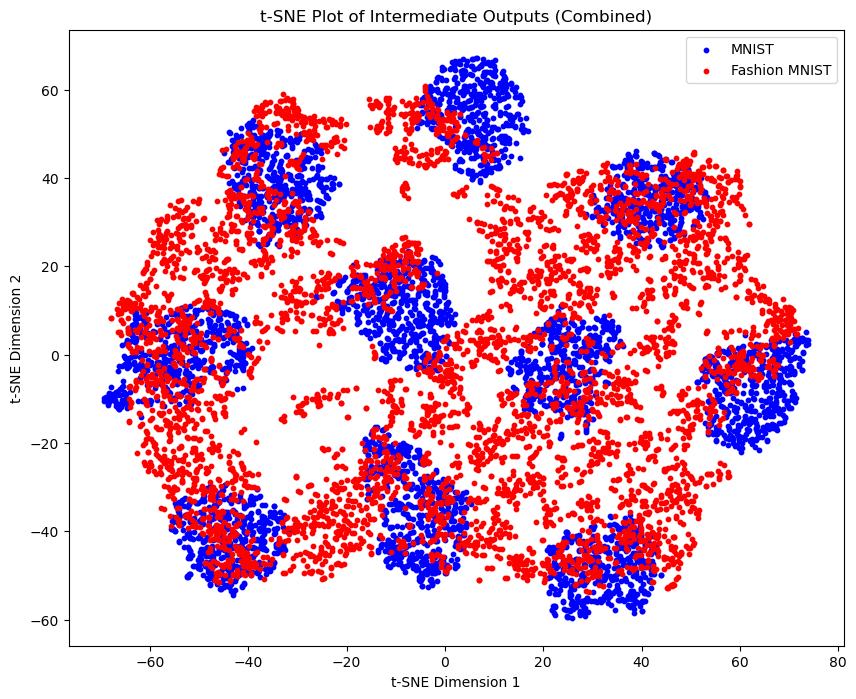

In [79]:
# to analyse it is better to plot predictions of both mnist and fashion mnist in the same plot with 2 different colors
model = load_model('model.h5')
model_without_last_layer = Sequential(model.layers[:-1])
intermediate_outputs_mnist = model_without_last_layer.predict(train_X[:5000])
intermediate_outputs_fashion = model_without_last_layer.predict(x_train[:5000])  
tsne = TSNE(n_components=2)
tsne_outputs_mnist = tsne.fit_transform(intermediate_outputs_mnist)
tsne_outputs_fashion = tsne.fit_transform(intermediate_outputs_fashion)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_outputs_mnist[:, 0], tsne_outputs_mnist[:, 1], c='blue', s=10, label='MNIST')
plt.scatter(tsne_outputs_fashion[:, 0], tsne_outputs_fashion[:, 1], c='red', s=10, label='Fashion MNIST')
plt.title('t-SNE Plot of Intermediate Outputs (Combined)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

As I said it is pointless to find the accuracy because it should be near to zero as both data distributions are completely different. 

In [92]:
# using the model trained on mnist to predict on fashion mnist 
model = load_model('model.h5')
fashion_pred = model.predict(x_test)
test_loss_fashion, test_acc_fashion = model.evaluate(x_test, y_test_one_hot)
print('Test loss for fashion', test_loss_fashion)
print('Test accuracy for fashion', test_acc_fashion)
print(np.argmax(np.round(fashion_pred[0])))
print(np.argmax(np.round(y_test_one_hot[0])))



313/313 [==============================] - 1s 4ms/step - loss: 6.5073 - accuracy: 0.1214
Test loss for fashion 6.507347106933594
Test accuracy for fashion 0.12139999866485596
2
9


As accuracy is not a good measure, I have tried to plot the histograms of least_confident, entropy, and margin that I got to know about first time with the help of Zeel and the literature provided by him.

Least Confident: For each prediction, this is calculated as 1 - max_confidence, where max_confidence is the highest prediction probability for that instance.

Margin: This is calculated as the difference between the highest and second-highest prediction probabilities for each instance.

Entropy: This measures the "disorder" or "surprise" of the prediction probabilities. Higher entropy indicates more uncertainty.


#### Interpretations

A high least confidence value indicates that the model is uncertain about its prediction. This happens when the highest prediction probability is relatively low, meaning the model isn't sure about its choice.

A high margin value suggests that the model is confident in its prediction, as the top prediction has a significantly higher probability compared to the second highest prediction. Conversely, a low margin value indicates that the model's top prediction is not much more likely than an alternative prediction.

A high entropy value indicates that the prediction probabilities are spread out more evenly across different classes, implying that the model is uncertain about the correct class. Conversely, a low entropy value indicates that the model is more confident in its prediction.

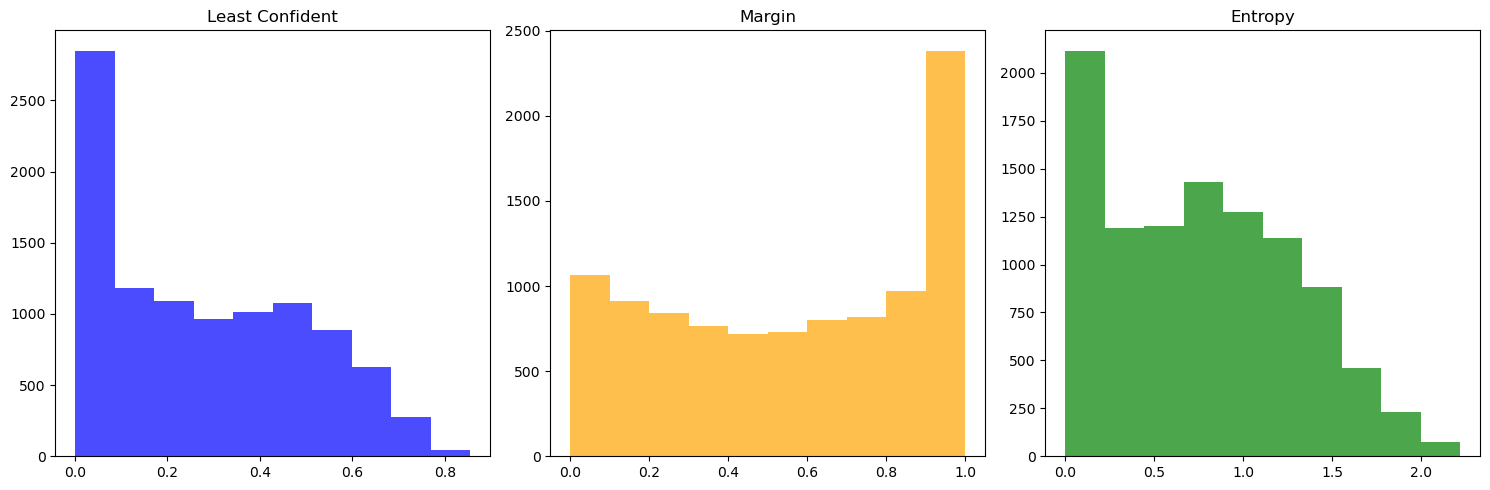

In [94]:
# Calculate uncertainty metrics because finding accuracy is useless for the case of Fashion mnist
least_confident = 1 - np.max(fashion_pred, axis=1)
margin = np.max(fashion_pred, axis=1) - np.partition(fashion_pred, -2)[:, -2]
entropy = -np.sum(fashion_pred * np.log(fashion_pred + 1e-10), axis=1)


plt.figure(figsize=(15, 5))

# histogram of least_confident
plt.subplot(1, 3, 1)
plt.hist(least_confident, bins=10, color='blue', alpha=0.7)
plt.title('Least Confident')

#histogram of margin
plt.subplot(1, 3, 2)
plt.hist(margin, bins=10, color='orange', alpha=0.7)
plt.title('Margin')

#histogram of entropy
plt.subplot(1, 3, 3)
plt.hist(entropy, bins=10, color='green', alpha=0.7)
plt.title('Entropy')

plt.tight_layout()
plt.show()


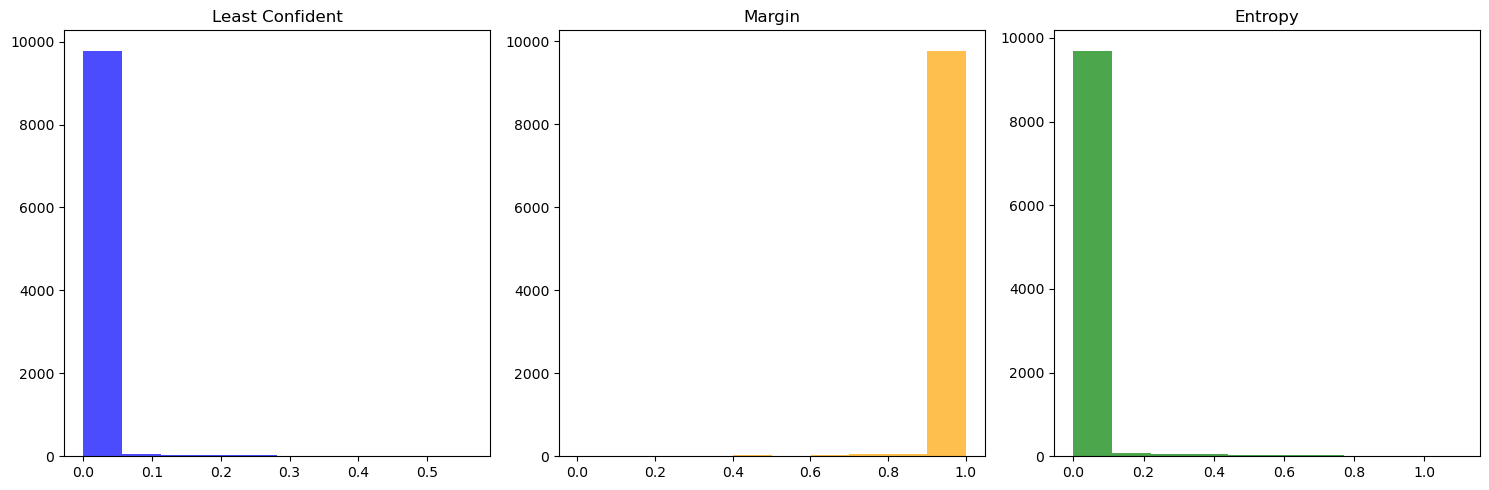

In [95]:
# Calculate uncertainty metrics of MNIST to compare with the plots of Fashion mnist
least_confident = 1 - np.max(predictions, axis=1)
margin = np.max(predictions, axis=1) - np.partition(predictions, -2)[:, -2]
entropy = -np.sum(predictions * np.log(predictions + 1e-10), axis=1)  

plt.figure(figsize=(15, 5))

#histogram of least_confident
plt.subplot(1, 3, 1)
plt.hist(least_confident, bins=10, color='blue', alpha=0.7)
plt.title('Least Confident')

#histogram of margin
plt.subplot(1, 3, 2)
plt.hist(margin, bins=10, color='orange', alpha=0.7)
plt.title('Margin')

#histogram of entropy
plt.subplot(1, 3, 3)
plt.hist(entropy, bins=10, color='green', alpha=0.7)
plt.title('Entropy')

plt.tight_layout()
plt.show()
